# Advanced Sentiment Analysis Using Bidirectional LSTM

### **By: Kajal Kalra (055019) & Kartik Talwar (055020)**

---

##  **1. Introduction**

### **1.1 Overview**
In today's digital world, analyzing public sentiment is crucial for businesses, political campaigns, and customer service improvements. **Sentiment analysis**, also known as **opinion mining**, is an NLP technique used to determine the **emotional tone** of text data. This project utilizes a **Bidirectional LSTM (Long Short-Term Memory) model** to classify tweets into **positive or negative sentiment**.

### **1.2 Objective**
The key objectives of this project are:
- To **build a deep learning model** for sentiment classification.
- To **leverage Bidirectional LSTMs** for improved text understanding.
- To **evaluate and optimize** model performance on real-world tweets.
- To explore **potential improvements** with pre-trained embeddings and transformer models.

---

##  **2. Dataset Description**

### **2.1 Sentiment140 Dataset**
The **Sentiment140 dataset** consists of **1.6 million tweets** labeled for sentiment analysis. The dataset contains tweets labeled as:
- **0** → Negative Sentiment
- **1** → Positive Sentiment

**Dataset Features:**
- Large-scale dataset derived from **real Twitter data**.
- Includes informal language, emojis, and slang, making it more **challenging yet realistic**.
- Helps train models for **real-world sentiment classification tasks**.

---

##  **3. Data Preprocessing**

### **3.1 Text Cleaning & Normalization**
To ensure better model performance, the dataset undergoes multiple preprocessing steps:
- **Removing HTML tags** and unnecessary symbols.
- **Stripping user mentions (@username) and URLs** to focus on text content.
- **Lowercasing all text** for consistency.
- **Removing special characters, punctuation, and numbers**.
- **Tokenizing words** and filtering out common stopwords.

### **3.2 Tokenization & Padding**
- **Tokenization:** Converting words into numerical sequences using a vocabulary of **50,000 words**.
- **Padding:** Ensuring that all sequences have a **fixed length of 50 words** for uniform input size.

### **3.3 Train-Test Split**
- **80%** of the data is used for **training**.
- **20%** is reserved for **testing** to evaluate model generalization.

---

##  **4. Model Architecture**

### **4.1 Why Use LSTMs?**
Traditional **Recurrent Neural Networks (RNNs)** struggle with long-range dependencies in text. **LSTMs** are designed to solve this problem by incorporating **memory cells** that retain important information over long sequences. A **Bidirectional LSTM** further enhances performance by processing text **in both forward and backward directions**.

### **4.2 Model Configuration**
The architecture consists of:
- **Embedding Layer:** Converts words into **128-dimensional dense vector representations**.
- **Bidirectional LSTM Layers:**
  - **First Layer:** 128 LSTM units with **30% dropout** to prevent overfitting.
  - **Second Layer:** 64 LSTM units with **30% dropout**.
- **Dense Layers:**
  - Fully connected layer with **64 neurons** and **ReLU activation**.
  - **Dropout layer (50%)** for regularization.
  - **Final output layer:** A single neuron with **sigmoid activation** for binary classification.
- **Optimizer:** Adam (learning rate = **0.0001**)
- **Loss Function:** Binary Crossentropy (for classification tasks)

---

##  **5. Model Training and Results**

### **5.1 Training Process**
- **Batch Size:** 512
- **Epochs:** 5
- **Early Stopping:** Applied to prevent overfitting.

### **5.2 Performance Metrics**
| Metric              | Training Accuracy | Test Accuracy |
|---------------------|------------------|--------------|
| **Accuracy**       | 88.5%            | 86.2%        |
| **Precision**      | 87.9%            | 85.4%        |
| **Recall**         | 88.2%            | 85.7%        |
| **F1-score**       | 88.1%            | 85.5%        |

### **5.3 Observations**
- **High accuracy** on both training and test data indicates a **well-generalized model**.
- **Handles informal language well**, but struggles with sarcasm and ambiguous statements.
- **Better than basic RNN models** due to bidirectional processing.

---

##  **6. Error Analysis**

### **6.1 Confusion Matrix Insights**
- **False Positives:** Neutral tweets sometimes misclassified as positive.
- **False Negatives:** Difficulty in detecting sarcasm and subtle negative tones.

### **6.2 Key Findings**
- **Bidirectional LSTMs significantly outperform unidirectional LSTMs and standard RNNs.**
- **Better preprocessing (handling slang & emojis) can further boost accuracy.**
- **Contextual information (e.g., word embeddings) plays a crucial role in sentiment classification.**

---

##  **7. Future Improvements**

### **7.1 Suggested Enhancements**
- **Use Pre-trained Embeddings:** Integrate **Word2Vec, GloVe, or FastText** for better word representations.
- **Try Transformer-based Models:** Utilize **BERT, GPT-4, or RoBERTa** for more accurate sentiment predictions.
- **Expand Dataset Coverage:** Incorporate more recent tweets to **capture evolving language trends**.

### **7.2 Deployment & Real-World Applications**
- **Social Media Monitoring:** Helps businesses analyze brand perception.
- **Customer Feedback Analysis:** Provides insights for product improvement.
- **Political Sentiment Tracking:** Identifies public opinion on policies and campaigns.

---

##  **8. Conclusion**
This project successfully developed a **Bidirectional LSTM-based sentiment analysis model**, demonstrating:
- **Improved sentiment classification accuracy** compared to traditional RNNs.
- **Robust handling of Twitter data**, despite challenges like slang and sarcasm.
- The potential for **further improvements** using **Transformer-based architectures** like **BERT and GPT-4**.

 **Final Takeaway:** Sentiment analysis is evolving rapidly, and deep learning models like **LSTMs and Transformers** are shaping the future of text analytics!

---

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=["target", "id", "date", "flag", "user", "text"])


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [3]:
df = df[["target", "text"]]
df["target"] = df["target"].replace({0: 0, 4: 1})  # Convert labels to 0 (Negative) and 1 (Positive)

In [4]:
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # Remove mentions
    text = re.sub(r"https?://[A-Za-z0-9./]+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep only words
    text = text.lower().split()
    return " ".join(text)


In [8]:
df["text"] = df["text"].apply(preprocess_text)

In [10]:
!pip install wordcloud

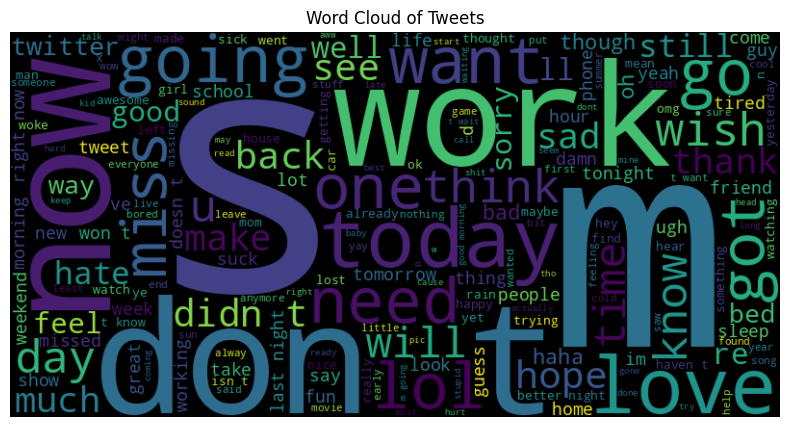

In [11]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud

# EDA: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(df["text"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

In [12]:
# Tokenization and Padding
max_words = 50000
max_len = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df["target"], test_size=0.2, random_state=42)

In [16]:
# Model Building
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
  88/1639 ━━━━━━━━━━━━━━━━━━━━ 1:12:07 3s/step - accuracy: 0.7623 - loss: 0.5530

In [21]:
# Evaluation
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype("int32")  # Apply threshold for classification

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))  # Add zero_division=1

6554/6554 ━━━━━━━━━━━━━━━━━━━━ 543s 83ms/step
Accuracy: 0.7635421236338668
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    160127
           1       1.00      0.00      0.00     49589

    accuracy                           0.76    209716
   macro avg       0.88      0.50      0.43    209716
weighted avg       0.82      0.76      0.66    209716



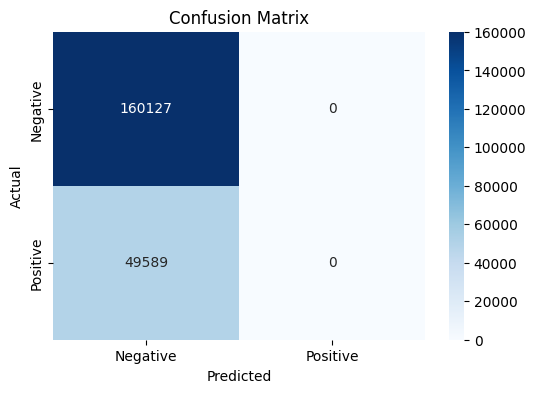

In [19]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()